In [6]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import models
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
import tensorflow as tf

In [7]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.shape

(15509, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [12]:
df.dropna(inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [15]:
# Convert into the correct data types
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [16]:
df.dtypes

,0
Name,object
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [17]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Zindagi,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


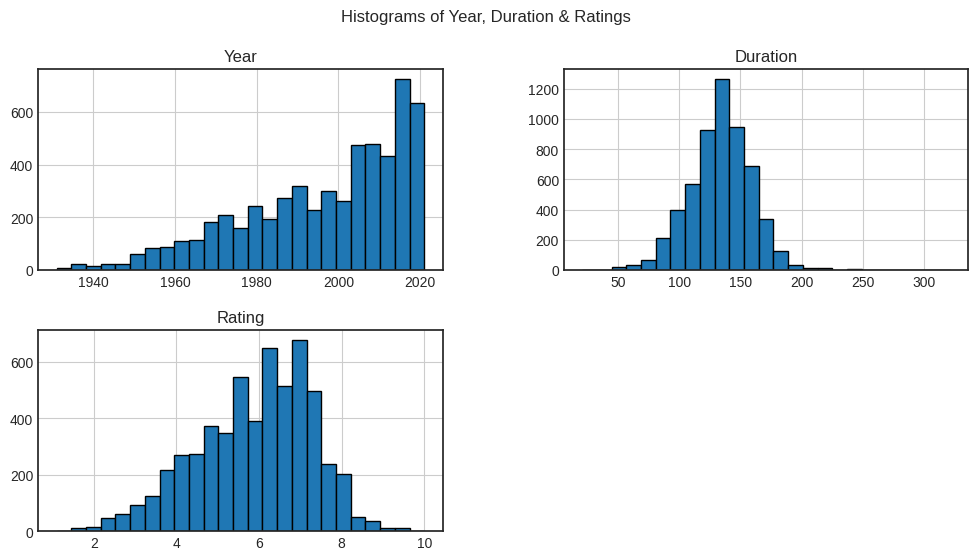

In [18]:
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration','Rating']].hist(bins=25, edgecolor='black',figsize=(12, 6))
plt.suptitle('Histograms of Year, Duration & Ratings ')
plt.show()

/tmp/ipython-input-19-929813214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')


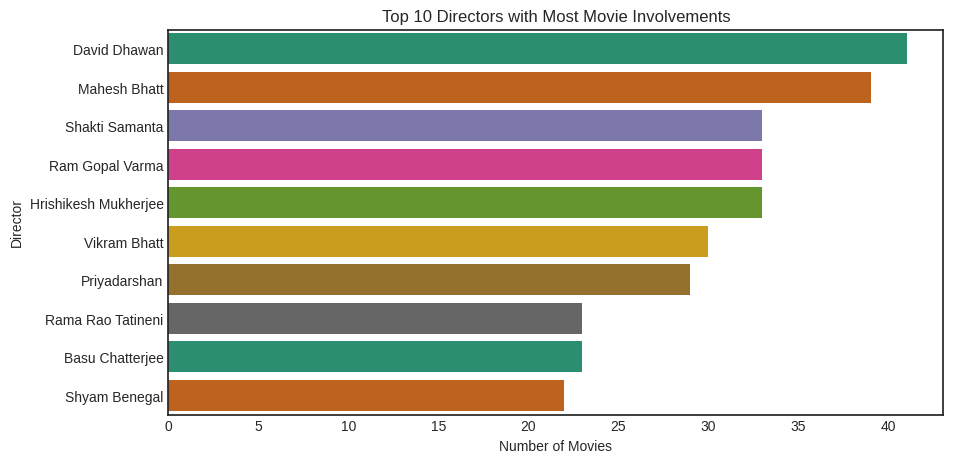

In [19]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

/tmp/ipython-input-20-3927813449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')


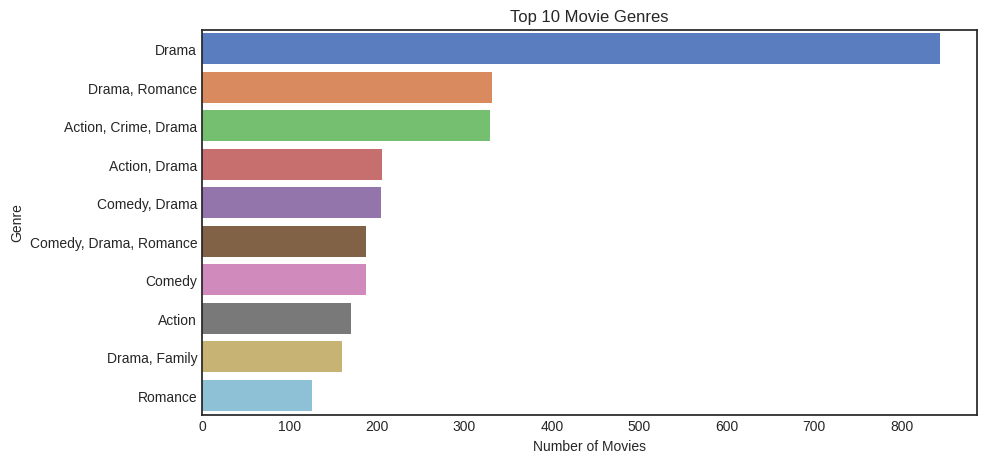

In [20]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [21]:
# Top 10 Actors With Most Movie Involvements
# Combine the three actor columns into one Series
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Display the top 10 actors
top_10_actors = combined_actors.value_counts().head(10)
top_10_actors

,count
Mithun Chakraborty,160
Amitabh Bachchan,148
Dharmendra,146
Ashok Kumar,124
Akshay Kumar,120
Shashi Kapoor,117
Jeetendra,116
Sanjay Dutt,101
Rekha,92
Ajay Devgn,92


/tmp/ipython-input-22-2079350178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')


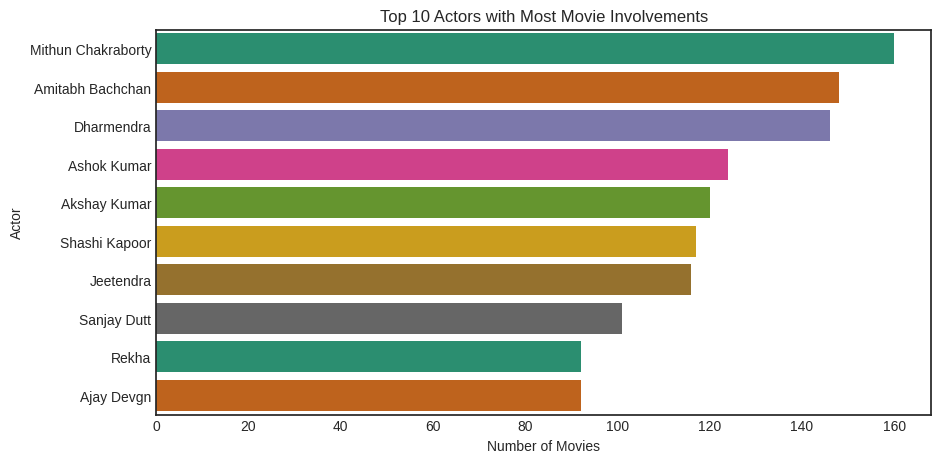

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

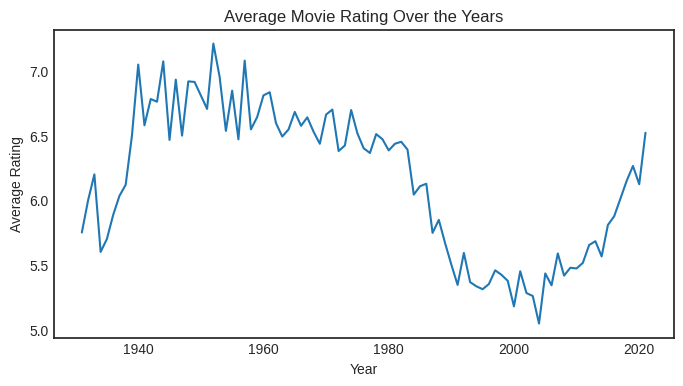

In [23]:
# Average Rating over these years

# Calculate the average rating for each year
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

#Plot
plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(False)
plt.show()

In [24]:
# High rated movie details
high_rating_movies = df[df['Rating'] > 8.5]
high_rating_movies

# Group by Rating and get the count of movies which have higher than rating value 8.5
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
10,10.0,1
9,9.7,1
8,9.4,3
7,9.3,7
6,9.2,2
5,9.1,4
4,9.0,5
3,8.9,5
2,8.8,6
1,8.7,8


<Axes: >

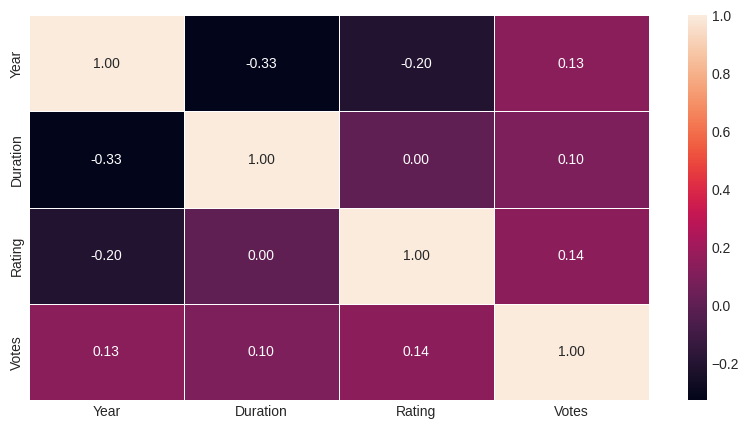

In [25]:
#Relationship between numeric variables
new_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=new_df.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.5)

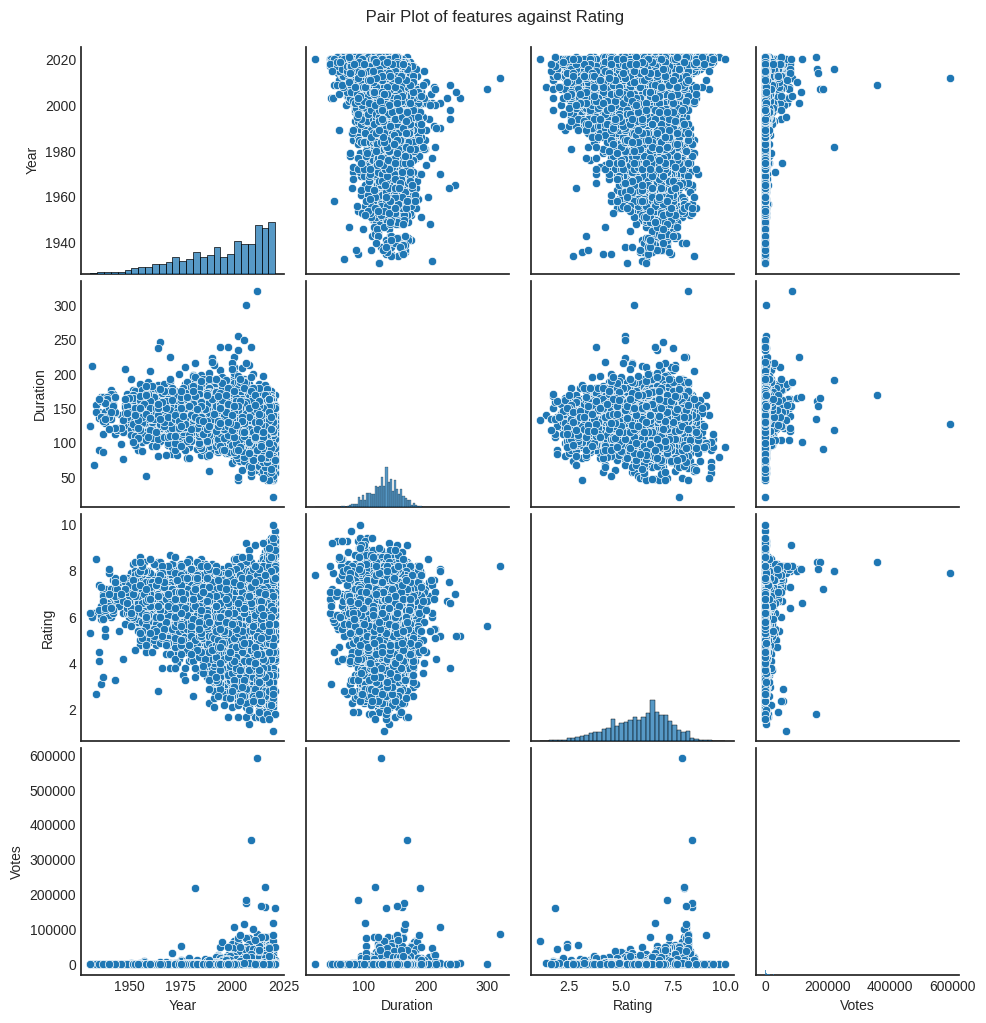

In [26]:
sns.pairplot(new_df,diag_kind='auto')
plt.suptitle(' Pair Plot of features against Rating', y=1.02)
plt.show()

In [27]:
# Create new features

Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating

Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating

Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating

Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating

Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating

df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.100000,6.725000,6.100000,5.850000
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.950000,7.250000,4.157143,5.823077,5.954545
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.270000,6.307692,5.800000,6.050000
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.225000,5.481707,4.640000,5.737500


Data Spliting


In [28]:
# Define feature and target variables
x= df[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=df['Rating']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state= 1 )

In [30]:
train_data= x_train.join(y_train)
train_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Rating
8901,2019,3146,152,5.266355,3.875000,5.185714,5.433333,2.900000,3.6
3288,2018,257,140,6.032692,6.650000,5.100000,5.100000,5.950000,5.1
15288,2019,500,92,5.640642,5.850000,8.600000,8.600000,8.600000,8.6
62,2019,361,126,5.800000,6.100000,6.550000,6.100000,6.557143,6.1
6926,1983,75,156,4.733333,5.625000,5.408989,6.279167,4.800000,5.6
...,...,...,...,...,...,...,...,...,...
2359,1980,17,131,6.415521,6.782353,5.440000,6.600000,6.000000,6.0
14284,2014,17169,129,5.743465,6.133333,5.828571,5.955556,5.130769,6.5
10787,2017,24,134,5.295238,4.975000,5.350000,5.360000,6.360000,7.2
522,1966,109,170,6.287500,6.400000,6.784615,6.286842,6.841667,6.6


In [31]:
from sklearn.tree import DecisionTreeRegressor

fitted_model_dt = DecisionTreeRegressor()
fitted_model_dt.fit(x_train, y_train)
y_pred_dt = fitted_model_dt.predict(x_test)

In [32]:
from sklearn.svm import SVR

fitted_model_svr = SVR()
fitted_model_svr.fit(x_train, y_train)
y_pred_svr = fitted_model_svr.predict(x_test)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

fitted_model_gb = GradientBoostingRegressor()
fitted_model_gb.fit(x_train, y_train)
y_pred_gb = fitted_model_gb.predict(x_test)

In [34]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE_dt =  mean_squared_error(y_test, y_pred_dt)
MAE_dt = mean_absolute_error(y_test, y_pred_dt)
R2_Score_dt = r2_score(y_test, y_pred_dt)

print('   Performance Evaluation for DecisionTreeRegressor Model: ')
print('Mean squared error value is: ', MSE_dt)
print('Mean absolute error value is: ', MAE_dt)
print('R2 score value is: ', R2_Score_dt)

MSE_svr =  mean_squared_error(y_test, y_pred_svr)
MAE_svr = mean_absolute_error(y_test, y_pred_svr)
R2_Score_svr = r2_score(y_test, y_pred_svr)

print('\n   Performance Evaluation for SVR Model: ')
print('Mean squared error value is: ', MSE_svr)
print('Mean absolute error value is: ', MAE_svr)
print('R2 score value is: ', R2_Score_svr)

MSE_gb =  mean_squared_error(y_test, y_pred_gb)
MAE_gb = mean_absolute_error(y_test, y_pred_gb)
R2_Score_gb = r2_score(y_test, y_pred_gb)

print('\n   Performance Evaluation for GB Model: ')
print('Mean squared error value is: ', MSE_gb)
print('Mean absolute error value is: ', MAE_gb)
print('R2 score value is: ', R2_Score_gb)

   Performance Evaluation for DecisionTreeRegressor Model: 
Mean squared error value is:  0.6951413427561838
Mean absolute error value is:  0.5561837455830388
R2 score value is:  0.6241730105969514

   Performance Evaluation for SVR Model: 
Mean squared error value is:  1.8107450744107199
Mean absolute error value is:  1.0535464732802038
R2 score value is:  0.0210237428924287

   Performance Evaluation for GB Model: 
Mean squared error value is:  0.37868650710807694
Mean absolute error value is:  0.4369947215599964
R2 score value is:  0.7952637814207768


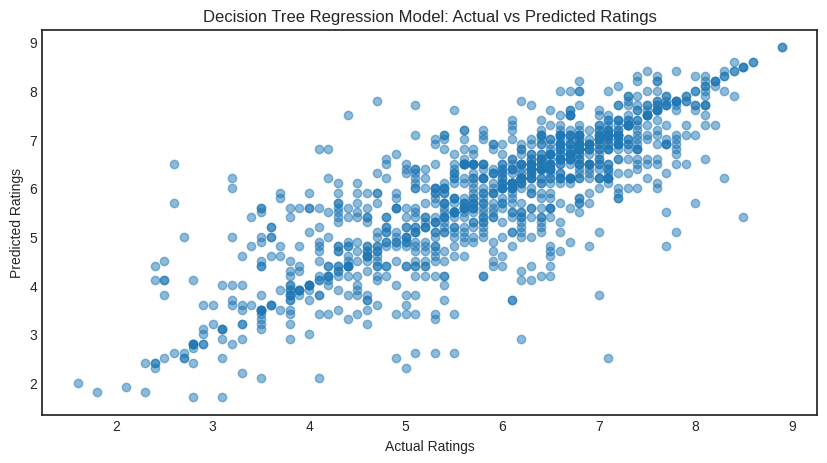

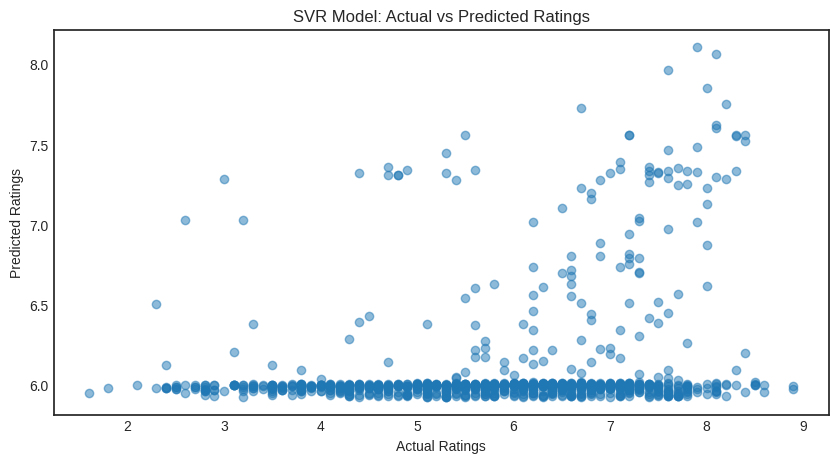

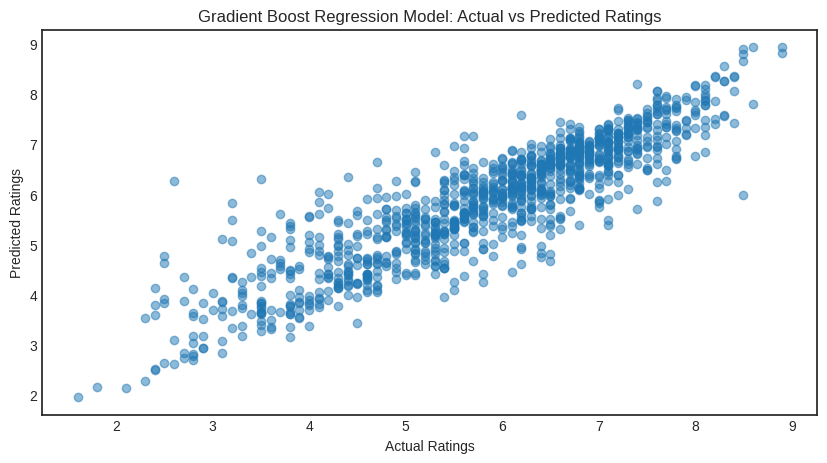

In [35]:
# Scatter plot for Decision Tree Regression model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.title('Decision Tree Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for SVR model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('SVR Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Gradient Boost Regression model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.title('Gradient Boost Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


In [36]:
data = {'Year': [2018], 'Votes': [100] ,'Duration': [130], 'Genre_Average_Rating':[6.0],'Director_Average_Rating':[6.5],'Actor1_Average_Rating':[5.5],'Actor2_Average_Rating':[5.8],'Actor3_Average_Rating':[5.3]}
trail_data = pd.DataFrame(data)

In [37]:
# Predict rating using trial data
predict_rating = fitted_model_gb.predict(trail_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  5.667351892478533


Conclusion




The coefficient of the determination or the R2 score value of Gradient Boost Regression model is 0.795 which greater than other 2 models and it means about 79.5% of the variance in the target variable(Rating) is strongly explained by the model. Also, the mean squared error value or the difference between actual and predicted value is 0.378 and the mean absolute error values is 0.430. Both values seem reasonably low and also both values less than values of other 2 models.